## 132 - GFS Weekend Forecast

[Youtube](https://www.youtube.com/watch?v=6vVYNGkLdTs)

In [1]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from siphon.catalog import TDSCatalog

In [2]:
gfs_catalog = ('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p5deg/Best')

In [3]:
cat = TDSCatalog(gfs_catalog)

cat.datasets

['Best GFS Half Degree Forecast Time Series']

In [4]:
ncss = cat.datasets[0].subset()

ncss.variables

{'Absolute_vorticity_isobaric',
 'Albedo_surface_Mixed_intervals_Average',
 'Apparent_temperature_height_above_ground',
 'Best_4_layer_Lifted_Index_surface',
 'Categorical_Freezing_Rain_surface',
 'Categorical_Freezing_Rain_surface_Mixed_intervals_Average',
 'Categorical_Ice_Pellets_surface',
 'Categorical_Ice_Pellets_surface_Mixed_intervals_Average',
 'Categorical_Rain_surface',
 'Categorical_Rain_surface_Mixed_intervals_Average',
 'Categorical_Snow_surface',
 'Categorical_Snow_surface_Mixed_intervals_Average',
 'Cloud_Work_Function_entire_atmosphere_single_layer_Mixed_intervals_Average',
 'Cloud_mixing_ratio_hybrid',
 'Cloud_mixing_ratio_isobaric',
 'Cloud_water_entire_atmosphere_single_layer',
 'Composite_reflectivity_entire_atmosphere',
 'Convective_Precipitation_Rate_surface_Mixed_intervals_Average',
 'Convective_available_potential_energy_pressure_difference_layer',
 'Convective_available_potential_energy_surface',
 'Convective_inhibition_pressure_difference_layer',
 'Convective_

In [5]:
point_query = ncss.query()
point_query.time_range(datetime.utcnow(), datetime.utcnow() + timedelta(days = 3))
point_query.accept('csv')
point_query.variables('Temperature_surface', 'Precipitation_rate_surface')
point_query.lonlat_point(-105.3, 40.01)

var=Precipitation_rate_surface&var=Temperature_surface&time_start=2022-12-19T00%3A47%3A14.727663&time_end=2022-12-22T00%3A47%3A14.727671&longitude=-105.3&latitude=40.01&accept=csv

In [6]:
point_data = ncss.get_data(point_query)
point_data

/home/jessica/anaconda3/lib/python3.9/site-packages/siphon/ncss.py:432: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arrs = np.genfromtxt(fobj, dtype=None, names=names, delimiter=',',


{'time': array([b'2022-12-19T00:00:00Z', b'2022-12-19T03:00:00Z',
        b'2022-12-19T06:00:00Z', b'2022-12-19T09:00:00Z',
        b'2022-12-19T12:00:00Z', b'2022-12-19T15:00:00Z',
        b'2022-12-19T18:00:00Z', b'2022-12-19T21:00:00Z',
        b'2022-12-20T00:00:00Z', b'2022-12-20T03:00:00Z',
        b'2022-12-20T06:00:00Z', b'2022-12-20T09:00:00Z',
        b'2022-12-20T12:00:00Z', b'2022-12-20T15:00:00Z',
        b'2022-12-20T18:00:00Z', b'2022-12-20T21:00:00Z',
        b'2022-12-21T00:00:00Z', b'2022-12-21T03:00:00Z',
        b'2022-12-21T06:00:00Z', b'2022-12-21T09:00:00Z',
        b'2022-12-21T12:00:00Z', b'2022-12-21T15:00:00Z',
        b'2022-12-21T18:00:00Z', b'2022-12-21T21:00:00Z',
        b'2022-12-22T00:00:00Z'], dtype='|S20'),
 'station': array([b'GridPointRequestedAt[40.010N_105.300W]',
        b'GridPointRequestedAt[40.010N_105.300W]',
        b'GridPointRequestedAt[40.010N_105.300W]',
        b'GridPointRequestedAt[40.010N_105.300W]',
        b'GridPointRequestedAt[4

In [7]:
df = pd.DataFrame(point_data)
df.head()

,time,station,latitude,longitude,Precipitation_rate_surface,Temperature_surface
0,b'2022-12-19T00:00:00Z',b'GridPointRequestedAt[40.010N_105.300W]',40.0,-105.5,0.0,259.76294
1,b'2022-12-19T03:00:00Z',b'GridPointRequestedAt[40.010N_105.300W]',40.0,-105.5,0.0,259.49140
2,b'2022-12-19T06:00:00Z',b'GridPointRequestedAt[40.010N_105.300W]',40.0,-105.5,0.0,258.89140
3,b'2022-12-19T09:00:00Z',b'GridPointRequestedAt[40.010N_105.300W]',40.0,-105.5,0.0,258.78275
4,b'2022-12-19T12:00:00Z',b'GridPointRequestedAt[40.010N_105.300W]',40.0,-105.5,0.0,257.33707


In [8]:
hours = np.arange(len(df)) * 3
hours

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57, 60, 63, 66, 69, 72])

<BarContainer object of 25 artists>

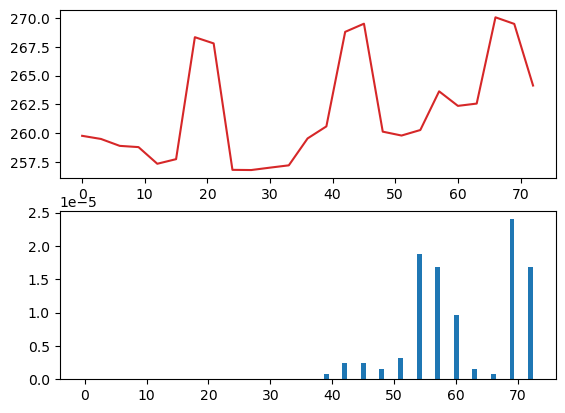

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows = 2)
ax1.plot(hours, df['Temperature_surface'], color = 'tab:red')
ax2.bar(hours, df['Precipitation_rate_surface'])